# Realizamos la normalización de la imagen1 original de la pagina web

Image shape:  (11363, 25202)
Image type:  uint8
Image max pixel value:  255
Image mean pixel value:  84.46498883407354
Image min pixel value:  0


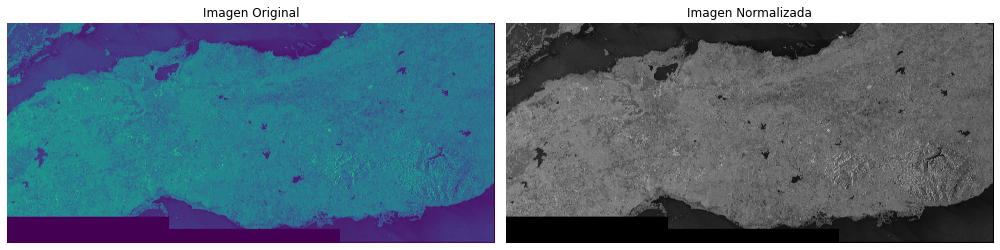

True

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

base_path = r'C:\Users\Daniel Calderon\Desktop\2024-2 Poli\Vision Con IA\Practica3_(Parcial)\Parte_1'

file_path = '\s1a-iw-grd-vv-20240826t111135-20240826t111152-055383-06c133-001_scaled.tiff' 
save_path = '\s1a-iw-grd-vv-20240826t111135-20240826t111152-055383-06c133-001_scaled.png'

img = cv2.imread(base_path + file_path, cv2.IMREAD_UNCHANGED) #Load image

#Comment the following 5 lines if you don't need them
print('Image shape: ', img.shape)
print('Image type: ', img.dtype)
print('Image max pixel value: ', np.max(img))
print('Image mean pixel value: ', np.mean(img))
print('Image min pixel value: ', np.min(img))

img2 = img.astype(np.single) #Change datatype to real values
escala_display = np.mean(img2) * 3.0 #Mean value times 3
min = np.min(img2) #Calculation of minimum value of pixel of all the image
img2[img2 > escala_display] = escala_display #Values higher or equal to mean*3 are reasigned to mean*3
img2[img2 < min] = 0 #Values lower than min(img) are reasigned to zero. Other values will remain the same
img3 = 255.0 * (img2 / escala_display) #Normalized to 0-1 and then rescaled 0-255
img4 = img3.astype(np.uint8) #Change datatype to 8-bit unsigned integer

# Convertir las imágenes de BGR a RGB
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Crear una figura para las subimágenes
plt.figure(figsize=(14, 7))  # Tamaño de la figura ajustado

# Subgráfico para la primera imagen
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.imshow(img)  # Mostrar la primera imagen
plt.title("Imagen Original")  # Título para la primera imagen
plt.axis('off')  # Quitar los ejes

# Subgráfico para la segunda imagen
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.imshow(img4)  # Mostrar la segunda imagen
plt.title("Imagen Normalizada")  # Título para la segunda imagen
plt.axis('off')  # Quitar los ejes

# Mostrar la figura completa con ambas imágenes
plt.tight_layout()  # Ajustar el layout
plt.show()  # Mostrar la ventana con las imágenes

cv2.imwrite(base_path + save_path, img4)


## **Resumen de la Pre_Etapa 1: Normalización de Imágenes**

## **Descripción General**
Este programa se encarga de procesar tres imágenes SAR (Synthetic Aperture Radar), normalizándolas para mejorar su visualización y análisis. Las imágenes originales se visualizan antes y después del proceso de normalización usando `matplotlib`.

## **Librerías Utilizadas**
- **OpenCV (`cv2`)**: Se utiliza para cargar, procesar y guardar las imágenes.
- **NumPy (`np`)**: Se utiliza para realizar cálculos numéricos y manipulaciones de arreglos.
- **Matplotlib (`plt`)**: Se utiliza para mostrar las imágenes antes y después de la normalización.

## **Pasos Realizados en el Programa**

1. **Cargar las Imágenes**:
   - Las imágenes se cargan desde tres rutas locales especificadas en formato `.tiff`, utilizando `cv2.imread()`.
   - Se cargan en su formato original, permitiendo el acceso a todos los canales de píxeles.

2. **Mostrar Información de las Imágenes Originales** (Opcional):
   - Se imprimen en la consola la forma, tipo, valor máximo, valor medio y valor mínimo de los píxeles de cada imagen. Esto proporciona una vista preliminar del contenido de las imágenes antes de la normalización.

3. **Normalización de la Imagen**:
   - Se convierte la imagen a un tipo de dato de punto flotante para permitir operaciones matemáticas precisas.
   - Se calcula un valor medio multiplicado por 3 para definir un límite superior de visualización.
   - Se reasignan los valores de los píxeles: aquellos que superan el límite se fijan en ese límite, y los valores menores al mínimo se establecen en 0.

4. **Escalado de la Imagen Normalizada**:
   - Se normalizan los valores de los píxeles a un rango de 0 a 255.
   - La imagen resultante se convierte nuevamente a un tipo de dato entero sin signo de 8 bits para su almacenamiento y visualización.

5. **Conversión de Color y Visualización**:
   - La imagen se convierte del formato BGR (utilizado por OpenCV) a RGB (requerido por Matplotlib) para una correcta visualización.
   - Se utilizan gráficos de `matplotlib` para mostrar la imagen normalizada, facilitando la comparación visual.

6. **Guardar las Imágenes Normalizadas**:
   - Después de la normalización, las imágenes se guardan en el mismo directorio bajo nombres específicos, cambiando su extensión a `.png` para facilitar el uso posterior, utilizando `cv2.imwrite()`.

7. **Normalización de Múltiples Imágenes**:
   - El proceso se repite para tres imágenes diferentes, utilizando rutas y nombres de archivo especificados, asegurando que todas las imágenes sean normalizadas de manera consistente.
